

Import common package

In [1]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Import homemade code

In [2]:

from qcat.state_discrimination.discriminator import train_model
from qcat.visualization.readout_fidelity import plot_readout_fidelity


File formate translate

In [3]:
dataset = xr.open_dataset(r"D:\Data\03205Q4C_6\ro_fidelity_20240404_2139.nc")

transposed_data = dataset.transpose("mixer", "state", "index")

format_data = {}
for ro_name, data in transposed_data.data_vars.items(): 
    new_data = data.values*1000
    format_data[ro_name] = new_data
    print(ro_name)



q0_ro
q1_ro
q2_ro


Create Discriminator object to analyze data

In [7]:

ro_name = "q0_ro"
analysis_data = format_data

training_data = format_data[ro_name]
dist_model = train_model(training_data)

new_data = np.moveaxis( analysis_data[ro_name] ,1,0)
p0_pop = dist_model.get_state_population(new_data[0].transpose())
p1_pop = dist_model.get_state_population(new_data[1].transpose())
print(p0_pop, p1_pop)


[9022  978]


Plot fidelity

Saving plot at 4.5.png
Saving plot at 4.5.png
Saving plot at 4.5.png


c:\Users\shiau\.conda\envs\PYQUM-server-offline\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


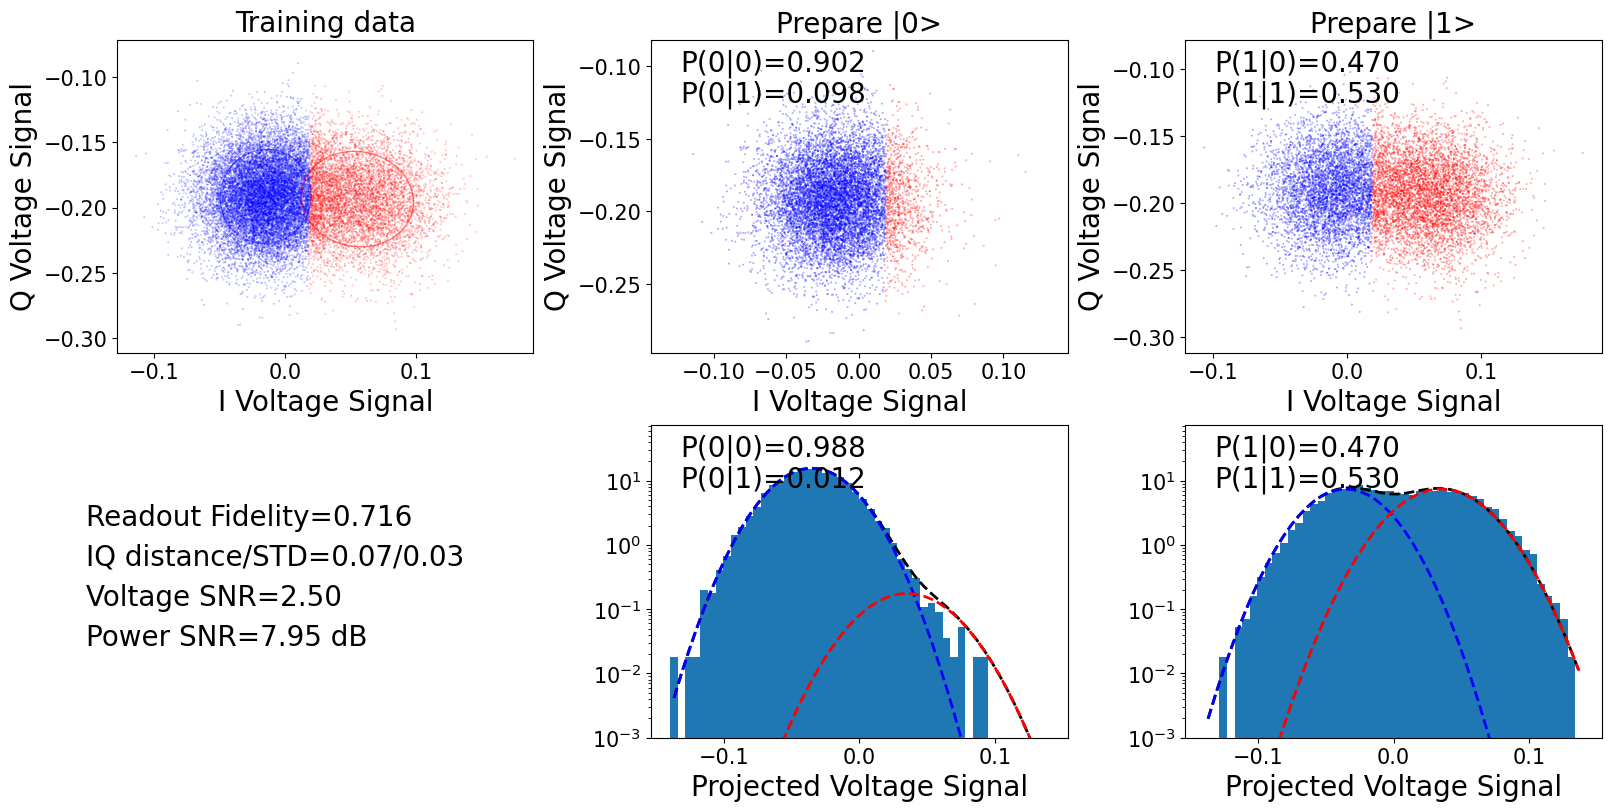

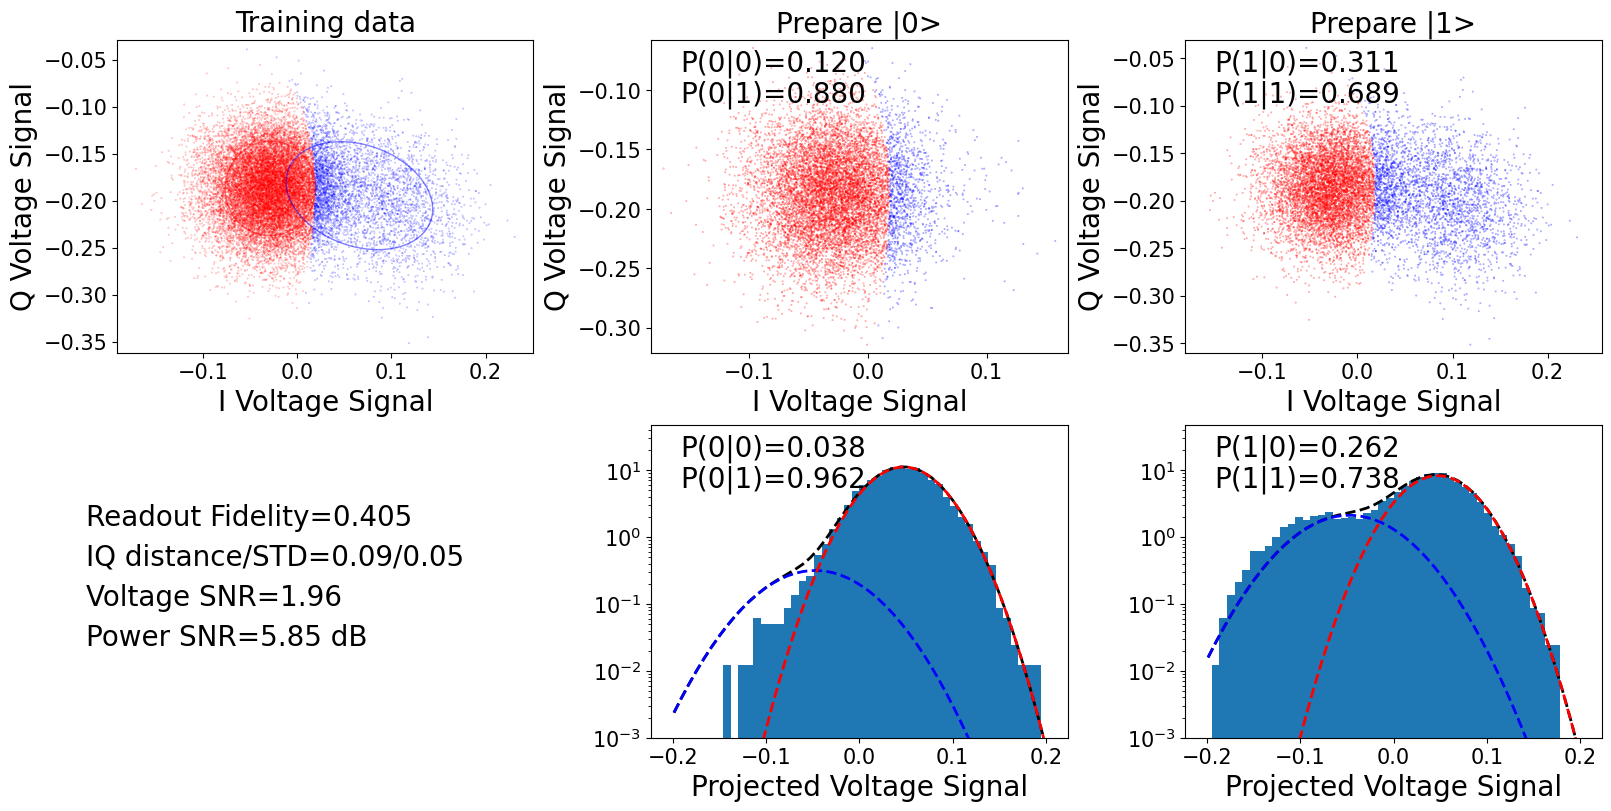

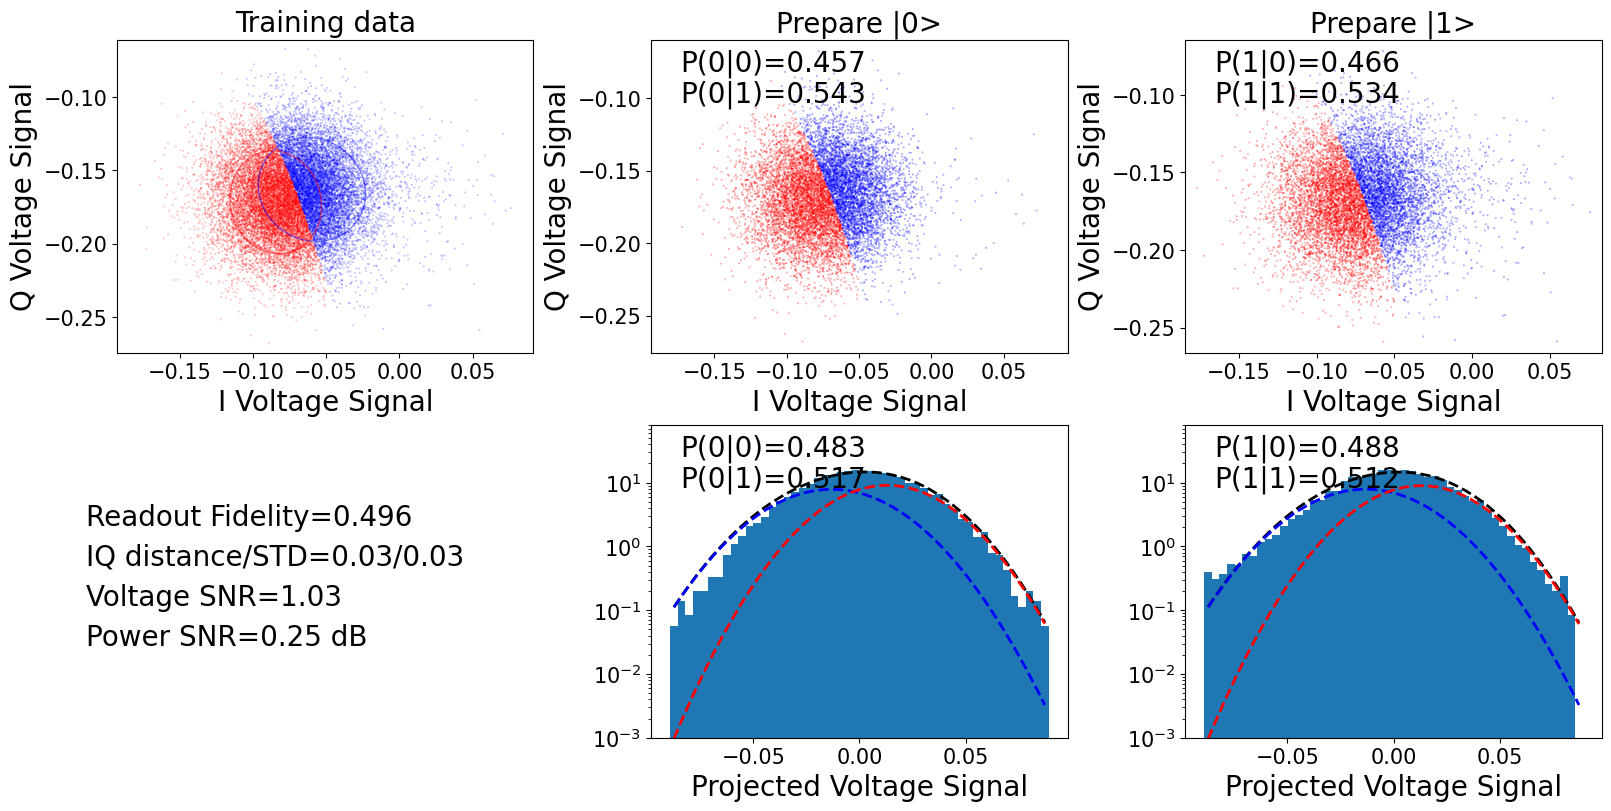

In [ ]:


for ro_name, data in format_data.items(): 
    plot_readout_fidelity(data, 4.5)

plt.show()
